# 높은 수익을 내는 게임을 개발해보자


In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# 전처리 과정


In [247]:
data = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'

df = pd.read_csv(data) #데이터셋 불러오기
df = df.drop(columns='Unnamed: 0') #불필요한 열 삭제
df.info() #Year, Genre, Publisher에 결측치가 있음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [248]:
# 연도, 장르, 제작사에 대해 결측치를 대체할 수 있는 것이 없다고 판단 
# 결측치 제거

df =df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [249]:
#단위 통일 과정 : M부호 제거
def change(x) : 
  if str(x).find("M"):
    return str(x).replace("M","")
  return str(x)

df['NA_Sales']=df['NA_Sales'].apply(change)
df['EU_Sales']=df['EU_Sales'].apply(change)
df['JP_Sales']=df['JP_Sales'].apply(change)
df['Other_Sales']=df['Other_Sales'].apply(change)

In [250]:
#단위 통일 과정 : K부호 제거 및 M단위에 맞춰 변경 / 문자열 -> 숫자열
def change2(x) :  
  if str(x).find("K"):
    return float(str(x).replace("K","000"))
  return float(x)

df['NA_Sales']=df['NA_Sales'].apply(change2)
df['EU_Sales']=df['EU_Sales'].apply(change2)
df['JP_Sales']=df['JP_Sales'].apply(change2)
df['Other_Sales']=df['Other_Sales'].apply(change2)

In [251]:
def change3(x):
  if float(x) >= 10000 :
    return float(x) / 1000000
  return float(x)

df['NA_Sales']=df['NA_Sales'].apply(change3)
df['EU_Sales']=df['EU_Sales'].apply(change3)
df['JP_Sales']=df['JP_Sales'].apply(change3)
df['Other_Sales']=df['Other_Sales'].apply(change3)

In [252]:
# 깨진 연도 파일 복구 / 2000년대
def change4(x) :
  if float(x)<20 :
    return float(x) + 2000
  return float(x)
# 깨진 연도 파일 복구 / 1980 ~ 1990년대
def change5(x) :
  if 80<float(x)<100 :
    return float(x) + 1900
  return float(x)

df['Year'] = df['Year'].apply(change4)
df['Year'] = df['Year'].apply(change5)

In [253]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 지역에 따라서 선호하는 게임 장르가 다를까

선호한다 = 출고량이 많다라고 판단

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


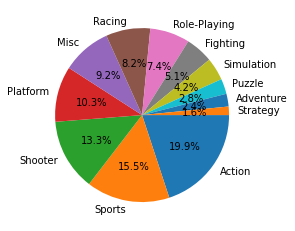

In [254]:
# NA지역의 장르별 출고량의 합 (내림차순) / 원그래프 시각화
NAGen = pd.DataFrame(df['NA_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False))
plt.pie(NAGen, labels=NAGen.index, autopct='%.1f%%', counterclock=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


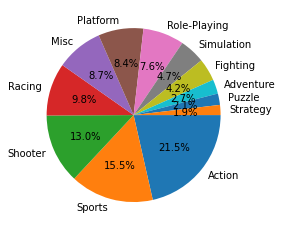

In [255]:
# NA지역의 장르별 출고량의 합 (내림차순) / 원그래프 시각화
EUGen = pd.DataFrame(df['EU_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False))
plt.pie(EUGen, labels=EUGen.index, autopct='%.1f%%', counterclock=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


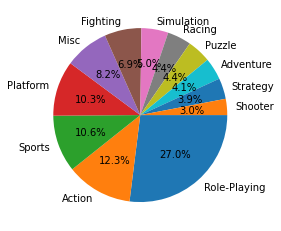

In [256]:
# JP지역의 장르별 출고량의 합 (내림차순) / 원그래프 시각화
JPGen = pd.DataFrame(df['JP_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False))
plt.pie(JPGen, labels=JPGen.index, autopct='%.1f%%', counterclock=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


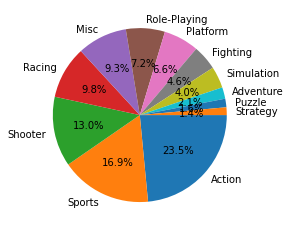

In [257]:
# 그 외 지역의 장르별 출고량의 합 (내림차순) / 원그래프 시각화 
OtherGen = pd.DataFrame(df['Other_Sales'].groupby(df['Genre']).sum().sort_values(ascending=False))
plt.pie(OtherGen, labels=OtherGen.index, autopct='%.1f%%', counterclock=False)
plt.show()

위 시각화된 데이터를 보았을 때, JP지역에 Role-Playing게임이 출고율이 높았다는점을 제외하면 모두 Action,Sports 장르의 게임의 출고량이 높다는것을 알 수 있다.

따라서 지역에 따라 선호하는 게임의 장르가 비슷하다고 볼 수 있을 것이다.

# 연도별 게임의 트렌드가 있을까

트렌드인 장르, 트렌드인 플랫폼등을 생각해 볼 수 있겠지만

필요한 정보는 트렌드인 장르뿐이라고 판단하여 진행

In [258]:
year = df['Year']
genre = df['Genre']
yg = pd.concat([year,genre], axis=1)
yg

,Year,Genre
0,2008.0,Action
1,2009.0,Action
2,2010.0,Adventure
3,2010.0,Misc
4,2010.0,Platform
...,...,...
16593,2006.0,Platform
16594,2005.0,Action
16595,2015.0,Sports
16596,2013.0,Action


In [259]:
def choice(year, genre):                      #0000년도에 00장르의 게임이 몇개 발매되었는지 알아보기위한 함수
  a = yg.loc[yg['Year'] == year]
  b = a.loc[yg['Genre'] == genre]
  return len(b)

In [260]:
years = list(range(1980, 2018))              #0000년도에 00장르의 게임이 몇개 발매되었는지 보기 쉽게 데이터프레임으로 제작
years = years + [2020]
genres = ['Action','Role-Playing','Sports','Shooter','Racing','Platform','Strategy','Fighting','Misc','Adventure','Simulation','Puzzle']

ygs = [(year, genre) for year in years for genre in genres]

adf = pd.DataFrame(index = years, columns= genres, dtype=int)

for y, g in ygs:
  result = choice(y, g) 
  adf.loc[y,g] = result

In [261]:
adf

,Action,Role-Playing,Sports,Shooter,Racing,Platform,Strategy,Fighting,Misc,Adventure,Simulation,Puzzle
1980,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
1981,25.0,0.0,4.0,10.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0
1982,18.0,0.0,2.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,3.0
1983,7.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0
1984,1.0,0.0,2.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
1985,2.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,4.0
1986,6.0,1.0,3.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,2.0,3.0,4.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0
1988,2.0,3.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
1989,2.0,2.0,3.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,5.0


In [262]:
adf.sum().sum() / len(adf)   # 한 해에 나오는 게임의 평균 개수

416.43589743589746

In [263]:
for i in years:                           # 400개 이상의 게임이 발매된 연도 구분
  big = adf.loc[i].values.sum() > 400
  print(i, big)

1980 False
1981 False
1982 False
1983 False
1984 False
1985 False
1986 False
1987 False
1988 False
1989 False
1990 False
1991 False
1992 False
1993 False
1994 False
1995 False
1996 False
1997 False
1998 False
1999 False
2000 False
2001 True
2002 True
2003 True
2004 True
2005 True
2006 True
2007 True
2008 True
2009 True
2010 True
2011 True
2012 True
2013 True
2014 True
2015 True
2016 False
2017 False
2020 False


In [264]:
years2 = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

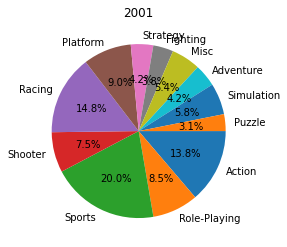

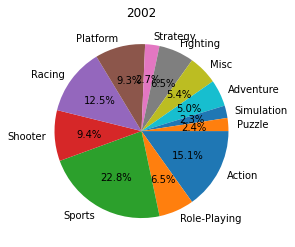

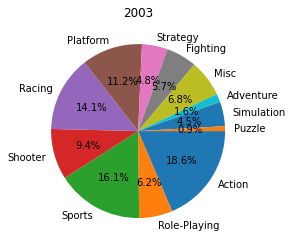

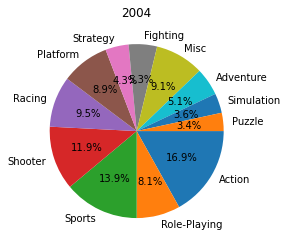

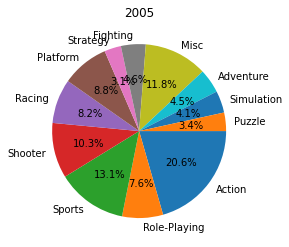

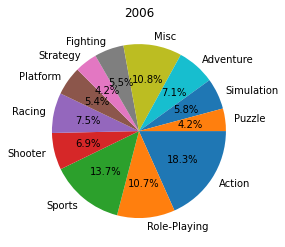

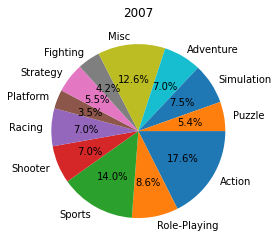

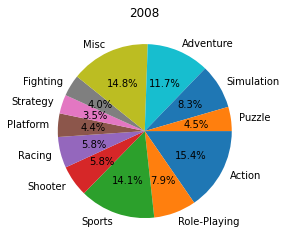

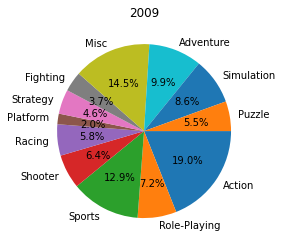

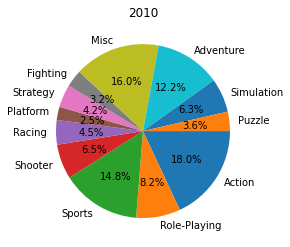

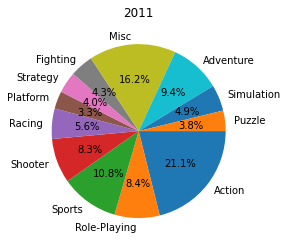

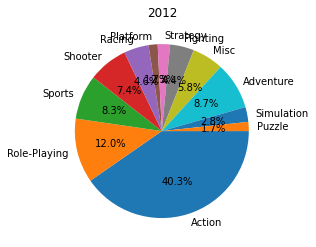

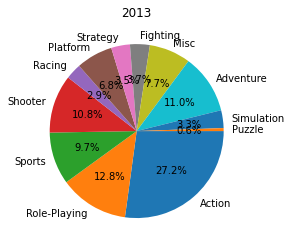

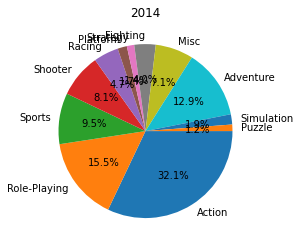

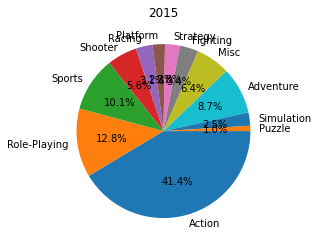

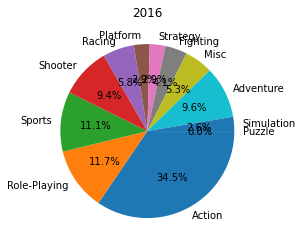

In [265]:
for i in years2:
  plt.pie(adf.loc[i], labels=adf.columns, autopct='%.1f%%', counterclock=False)
  plt.title(i)
  plt.show()

한 해에 게임이 장르별로 어느정도 나왔는지 알아보기 위해 

한 해에 발매된 게임의 총 수가 400개(평균) 이상인 해에 대해 원 그래프를 작성해 보았다.

각 연도별 많이 나온 게임의 장르는 다음과 같다.

2001년도부터 2003년도까지는 action,sports,racing

2004년도부터 2006년도까지는 action,sports

2007년도부터 2011년도까지는 action,sports,misc

2012년도이후부터는 action,role-playing 

이처럼 게임은 장르에 상관없이 고르게 발매되기 보다는 한가지 혹은 두,세 가지 정도의 장르가 많이 출시되고 있음을 알 수 있다.

특히 Action,Sports장르의 경우 꾸준히 높은 발매율을 보인다.

따라서 연도에 따라 유행하는 장르가 있다고 판단하기 어렵다.

# 출고량이 높은 게임에 대한 분석

공통점 혹은 공통된 특징 분석


In [266]:
df['Total_Sales'].sort_values(ascending=False).head(10)     # 전체 출고량이 높은 상위 10개의 게임 분류

2908     82.74
4199     40.24
12579    35.83
3352     33.00
7829     31.38
1203     30.26
6937     30.01
3014     29.01
16531    28.61
10488    28.31
Name: Total_Sales, dtype: float64

In [267]:
h1 = df.loc[2908]                    #데이터 프레임화
h1 = pd.Series.to_frame(h1)

h2 = df.loc[4199]
h2 = pd.Series.to_frame(h2)

h3 = df.loc[12579]
h3 = pd.Series.to_frame(h3)

h4 = df.loc[3352]
h4 = pd.Series.to_frame(h4)

h5 = df.loc[7829]
h5 = pd.Series.to_frame(h5)

h6 = df.loc[1203]
h6 = pd.Series.to_frame(h6)

h7 = df.loc[6937]
h7 = pd.Series.to_frame(h7)

h8 = df.loc[3014]
h8 = pd.Series.to_frame(h8)

h9 = df.loc[16531]
h9 = pd.Series.to_frame(h9)

h10 = df.loc[10488]
h10 = pd.Series.to_frame(h10)

In [268]:
h = pd.concat([h1,h2,h3,h4,h5,h6,h7,h8,h9,h10],axis=1)
h.columns = h.loc['Name']
h = h.drop(['Name'],axis=0)
h

Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue,Tetris,New Super Mario Bros.,Wii Play,New Super Mario Bros. Wii,Duck Hunt
Platform,Wii,NES,Wii,Wii,GB,GB,DS,Wii,Wii,NES
Year,2006,1985,2008,2009,1996,1989,2006,2006,2009,1984
Genre,Sports,Platform,Racing,Sports,Role-Playing,Puzzle,Platform,Misc,Platform,Shooter
Publisher,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo,Nintendo
NA_Sales,41.49,29.08,15.85,15.75,11.27,23.2,11.38,14.03,14.59,26.93
EU_Sales,29.02,3.58,12.88,11.01,8.89,2.26,9.23,9.2,7.06,0.63
JP_Sales,3.77,6.81,3.79,3.28,10.22,4.22,6.5,2.93,4.7,0.28
Other_Sales,8.46,0.77,3.31,2.96,1,0.58,2.9,2.85,2.26,0.47
Total_Sales,82.74,40.24,35.83,33,31.38,30.26,30.01,29.01,28.61,28.31


높은 출고량의 상위 10개의 게임을 분석해 보았을 때,

제작사가 모두 닌텐도 임을 알 수 있다.

하지만 필요한 데이터가 아니므로 배제하기로 했다.

다음으로 보이는 특징은 NA,EU지역에서의 출고량이 높다는 점이다.

좀 더 쉽게 알아보기위해 시각화를 진행



In [269]:
h_sale = h.drop(['Platform','Year','Genre','Publisher','Total_Sales'])
h_sale1 = h_sale['Wii Sports']
h_sale2 = h_sale['Super Mario Bros.']
h_sale3 = h_sale['Mario Kart Wii']
h_sale4 = h_sale['Wii Sports Resort']
h_sale5 = h_sale['Pokemon Red/Pokemon Blue']
h_sale6 = h_sale['Tetris']
h_sale7 = h_sale['New Super Mario Bros.']
h_sale8 = h_sale['Wii Play']
h_sale9 = h_sale['New Super Mario Bros. Wii']
h_sale10 = h_sale['Duck Hunt']

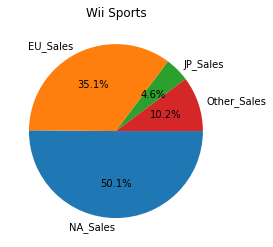

In [270]:
plt.pie(h_sale1, labels=h_sale1.index, autopct='%.1f%%', counterclock=False)
plt.title("Wii Sports")
plt.show()

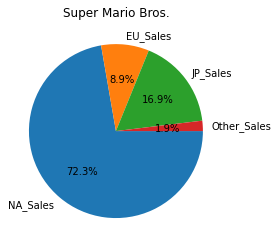

In [271]:
plt.pie(h_sale2, labels=h_sale2.index, autopct='%.1f%%', counterclock=False)
plt.title("Super Mario Bros.")
plt.show()

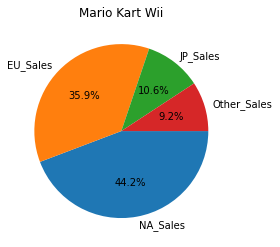

In [272]:
plt.pie(h_sale3, labels=h_sale3.index, autopct='%.1f%%', counterclock=False)
plt.title("Mario Kart Wii")
plt.show()

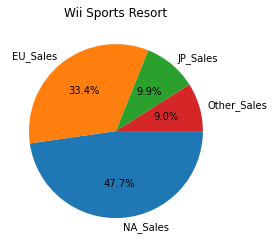

In [273]:
plt.pie(h_sale4, labels=h_sale4.index, autopct='%.1f%%', counterclock=False)
plt.title("Wii Sports Resort")
plt.show()

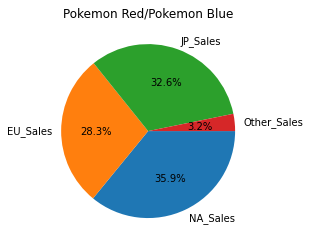

In [274]:
plt.pie(h_sale5, labels=h_sale5.index, autopct='%.1f%%', counterclock=False)
plt.title("Pokemon Red/Pokemon Blue")
plt.show()

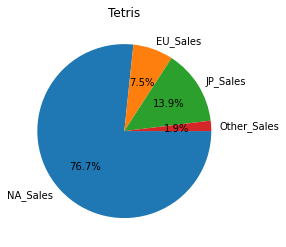

In [275]:
plt.pie(h_sale6, labels=h_sale6.index, autopct='%.1f%%', counterclock=False)
plt.title("Tetris")
plt.show()

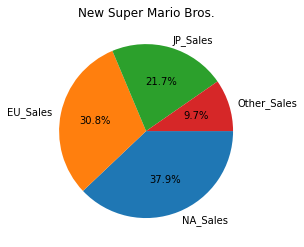

In [276]:
plt.pie(h_sale7, labels=h_sale7.index, autopct='%.1f%%', counterclock=False)
plt.title("New Super Mario Bros.")
plt.show()

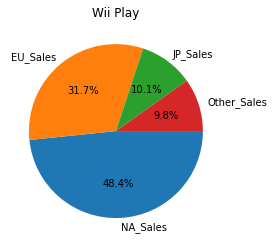

In [277]:
plt.pie(h_sale8, labels=h_sale8.index, autopct='%.1f%%', counterclock=False)
plt.title("Wii Play")
plt.show()

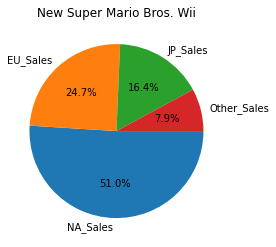

In [278]:
plt.pie(h_sale9, labels=h_sale9.index, autopct='%.1f%%', counterclock=False)
plt.title("New Super Mario Bros. Wii")
plt.show()

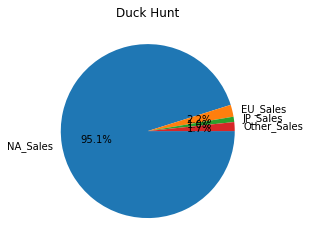

In [279]:
plt.pie(h_sale10, labels=h_sale10.index, autopct='%.1f%%', counterclock=False)
plt.title("Duck Hunt")
plt.show()

위의 그래프로 보아 출고량의 상당부분이 NA지역에서 나오고 있으며 그 뒤로 EU지역, JP지역이 따르는것을 볼 수 있다.

즉, 높은 출고량을 기록하고 싶다면 NA지역과 EU지역에서의 흥행을 고려해야할 것이다.


#최근 많이 사용되는 플랫폼 

과거 플랫폼의 경우 지원이 중단되거나, 단종되거나 하는 등에 이슈가 있을 수 있으므로

최근 5년간 많이 사용된 플랫폼을 알아보고 사용하기로 판단


In [285]:
pydf = df[['Platform','Year']]
pydf

,Platform,Year
0,DS,2008.0
1,Wii,2009.0
2,PSP,2010.0
3,DS,2010.0
4,PS3,2010.0
...,...,...
16593,GC,2006.0
16594,PSP,2005.0
16595,PS3,2015.0
16596,PSV,2013.0


In [286]:
pydf2 = pydf.loc[pydf['Year'] == 2015]
pydf2 = pydf2.reset_index()
pydf2 = pydf2.drop(['index'],axis=1)
pydf2

,Platform,Year
0,PS4,2015.0
1,3DS,2015.0
2,PS3,2015.0
3,XOne,2015.0
4,PSV,2015.0
...,...,...
606,3DS,2015.0
607,PS4,2015.0
608,PC,2015.0
609,PS4,2015.0


In [287]:
pydf3 = pydf.loc[pydf['Year'] == 2016]
pydf3 = pydf3.reset_index()
pydf3 = pydf3.drop(['index'],axis=1)
pydf3

,Platform,Year
0,PS4,2016.0
1,PS3,2016.0
2,PS4,2016.0
3,PS4,2016.0
4,X360,2016.0
...,...,...
337,XOne,2016.0
338,PSV,2016.0
339,PS4,2016.0
340,XOne,2016.0


In [288]:
pydf4 = pydf.loc[pydf['Year'] == 2017]
pydf4 = pydf4.reset_index()
pydf4 = pydf4.drop(['index'],axis=1)
pydf4

,Platform,Year
0,PSV,2017.0
1,PS4,2017.0
2,PSV,2017.0


In [289]:
print(pydf2['Year'].groupby(pydf2['Platform']).count().sort_values(ascending=False))

Platform
PS4     136
PSV     113
3DS      86
XOne     78
PS3      73
PC       50
X360     40
WiiU     28
Wii       4
PSP       3
Name: Year, dtype: int64


In [290]:
print(pydf3['Year'].groupby(pydf3['Platform']).count().sort_values(ascending=False))

Platform
PS4     107
PSV      58
XOne     54
PC       38
3DS      35
PS3      32
WiiU     10
X360      8
Name: Year, dtype: int64


In [291]:
print(pydf4['Year'].groupby(pydf4['Platform']).count().sort_values(ascending=False))

Platform
PSV    2
PS4    1
Name: Year, dtype: int64


# 플랫폼 결과

PS4 = 136 + 107 + 1 = 244

PSV = 113 + 58 +2 = 173 으로 PS4와 PSV가 가장 많이 사용되었다. 

# **최종 결론**

우리가 개발해야 할 게임이 출고량이 높기위해서는 NA,EU지역에서의 성공이 중요하다고 볼 수 있다.

따라서 NA,EU지역에서 인기있는 장르인 Action,Sports,Shooter 장르 중 한가지를 개발하면 좋을 것이고

구동시킬 플랫폼의 경우에는 최근 가장 많이 사용되어진 PS4, PSV 중 한가지를 선택해
개발하면 좋을 것이다.